In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
imdb, info = tfds.load("imdb_reviews",
                      with_info=True, as_supervised=True)

In [3]:
imdb

{'train': <PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>,
 'test': <PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>,
 'unsupervised': <PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>}

In [4]:
import numpy as np

In [5]:
train_data, test_data = imdb['train'], imdb['test']

In [9]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s,l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())

In [7]:
test_data

<PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>

In [11]:
training_labels

[0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,


In [12]:
for s,l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())

In [13]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [28]:
vocab_size = 10000
embedding_dim=16
max_length = 120
trunc_type= 'post'
oov_tok="<OOV>"

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [29]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, 
                       truncating = trunc_type)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

In [44]:
word_index

{'<OOV>': 1,
 'the': 2,
 'and': 3,
 'a': 4,
 'of': 5,
 'to': 6,
 'is': 7,
 'br': 8,
 'in': 9,
 'it': 10,
 'i': 11,
 'this': 12,
 'that': 13,
 'was': 14,
 'as': 15,
 'for': 16,
 'with': 17,
 'movie': 18,
 'but': 19,
 'film': 20,
 "'s": 21,
 'on': 22,
 'you': 23,
 'not': 24,
 'are': 25,
 'his': 26,
 'he': 27,
 'have': 28,
 'be': 29,
 'one': 30,
 'all': 31,
 'at': 32,
 'by': 33,
 'they': 34,
 'an': 35,
 'who': 36,
 'so': 37,
 'from': 38,
 'like': 39,
 'her': 40,
 "'t": 41,
 'or': 42,
 'just': 43,
 'there': 44,
 'about': 45,
 'out': 46,
 "'": 47,
 'has': 48,
 'if': 49,
 'some': 50,
 'what': 51,
 'good': 52,
 'more': 53,
 'very': 54,
 'when': 55,
 'she': 56,
 'up': 57,
 'can': 58,
 'b': 59,
 'time': 60,
 'no': 61,
 'even': 62,
 'my': 63,
 'would': 64,
 'which': 65,
 'story': 66,
 'only': 67,
 'really': 68,
 'see': 69,
 'their': 70,
 'had': 71,
 'were': 72,
 'me': 73,
 'well': 74,
 'we': 75,
 'than': 76,
 'much': 77,
 'been': 78,
 'get': 79,
 'bad': 80,
 'will': 81,
 'people': 82,
 'do': 83,

In [41]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                             input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 64)                9600      
_________________________________________________________________
dense_12 (Dense)             (None, 10)                650       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 11        
Total params: 170,261
Trainable params: 170,261
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(loss="binary_crossentropy",
             optimizer='adam',
             metrics=['accuracy'])

In [43]:
num_epochs=30
history=model.fit(padded, training_labels_final, epochs=num_epochs,
                 validation_data = (testing_padded, testing_labels_final))

Epoch 1/30
782/782 [==============================] - 50s 60ms/step - loss: 0.5664 - accuracy: 0.6990 - val_loss: 0.4313 - val_accuracy: 0.8025
Epoch 2/30
782/782 [==============================] - 43s 56ms/step - loss: 0.3638 - accuracy: 0.8440 - val_loss: 0.3667 - val_accuracy: 0.8394
Epoch 3/30
782/782 [==============================] - 44s 56ms/step - loss: 0.2852 - accuracy: 0.8882 - val_loss: 0.3695 - val_accuracy: 0.8420
Epoch 4/30
782/782 [==============================] - 43s 55ms/step - loss: 0.2330 - accuracy: 0.9120 - val_loss: 0.3979 - val_accuracy: 0.8381
Epoch 5/30
782/782 [==============================] - 42s 54ms/step - loss: 0.1942 - accuracy: 0.9323 - val_loss: 0.4386 - val_accuracy: 0.8334
Epoch 6/30
782/782 [==============================] - 44s 56ms/step - loss: 0.1573 - accuracy: 0.9472 - val_loss: 0.4546 - val_accuracy: 0.8290
Epoch 7/30
782/782 [==============================] - 44s 57ms/step - loss: 0.1223 - accuracy: 0.9612 - val_loss: 0.5259 - val_accuracy:

In [39]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                650       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 173,205
Trainable params: 173,205
Non-trainable params: 0
_________________________________________________________________


In [40]:
num_epochs=30
history1=model1.fit(padded, training_labels_final, epochs=num_epochs,
                 validation_data = (testing_padded, testing_labels_final))

Epoch 1/30
782/782 [==============================] - 46s 54ms/step - loss: 0.4740 - accuracy: 0.7665 - val_loss: 0.3732 - val_accuracy: 0.8413
Epoch 2/30
782/782 [==============================] - 38s 48ms/step - loss: 0.3010 - accuracy: 0.8789 - val_loss: 0.3687 - val_accuracy: 0.8397
Epoch 3/30
782/782 [==============================] - 37s 48ms/step - loss: 0.2380 - accuracy: 0.9079 - val_loss: 0.4850 - val_accuracy: 0.8311
Epoch 4/30
782/782 [==============================] - 38s 48ms/step - loss: 0.1890 - accuracy: 0.9306 - val_loss: 0.4697 - val_accuracy: 0.8355
Epoch 5/30
782/782 [==============================] - 41s 53ms/step - loss: 0.1453 - accuracy: 0.9494 - val_loss: 0.4581 - val_accuracy: 0.8305
Epoch 6/30
782/782 [==============================] - 42s 54ms/step - loss: 0.1118 - accuracy: 0.9622 - val_loss: 0.7176 - val_accuracy: 0.8212
Epoch 7/30
782/782 [==============================] - 41s 53ms/step - loss: 0.0952 - accuracy: 0.9676 - val_loss: 0.7107 - val_accuracy:

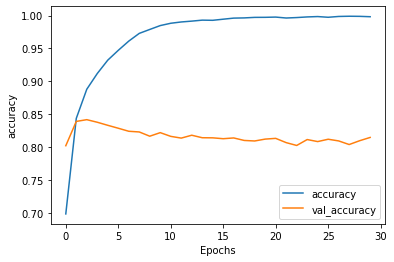

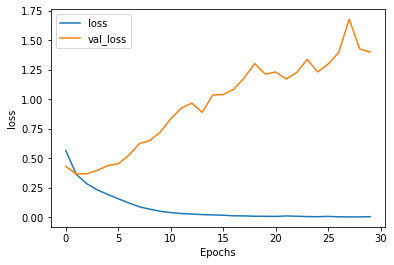

In [45]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

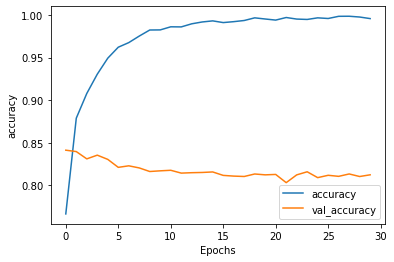

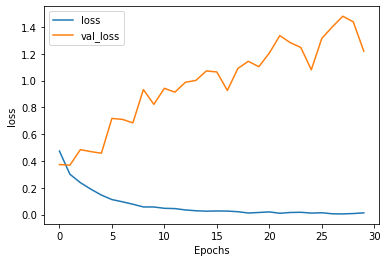

In [46]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history1, 'accuracy')
plot_graphs(history1, 'loss')

In [48]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                             input_length=max_length),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                1568      
_________________________________________________________________
dense_16 (Dense)             (None, 10)                330       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 11        
Total params: 161,909
Trainable params: 161,909
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [51]:
num_epochs=30
history=model.fit(padded, training_labels_final, epochs=num_epochs, validation_data = (testing_padded, testing_labels_final))

Epoch 1/30
782/782 [==============================] - 17s 20ms/step - loss: 0.6881 - accuracy: 0.5256 - val_loss: 0.6479 - val_accuracy: 0.6355
Epoch 2/30
782/782 [==============================] - 15s 19ms/step - loss: 0.5035 - accuracy: 0.7632 - val_loss: 0.4880 - val_accuracy: 0.7865
Epoch 3/30
782/782 [==============================] - 15s 20ms/step - loss: 0.2917 - accuracy: 0.8804 - val_loss: 0.5812 - val_accuracy: 0.7457
Epoch 4/30
782/782 [==============================] - 16s 20ms/step - loss: 0.1393 - accuracy: 0.9489 - val_loss: 0.6386 - val_accuracy: 0.7952
Epoch 5/30
782/782 [==============================] - 15s 19ms/step - loss: 0.0655 - accuracy: 0.9768 - val_loss: 0.9400 - val_accuracy: 0.7277
Epoch 6/30
782/782 [==============================] - 16s 20ms/step - loss: 0.0360 - accuracy: 0.9880 - val_loss: 0.9493 - val_accuracy: 0.7912
Epoch 7/30
782/782 [==============================] - 15s 20ms/step - loss: 0.0273 - accuracy: 0.9900 - val_loss: 1.1033 - val_accuracy:

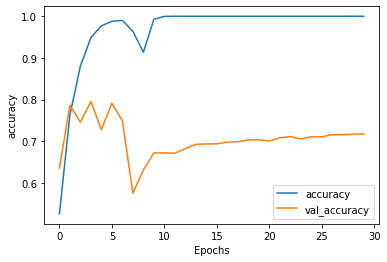

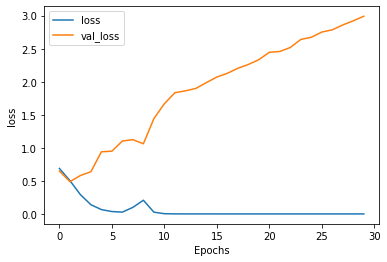

In [52]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')